# Divided Months Study

This notebook looks at relationships between temperatures when dividing the winter of 2013 into the three categories of July data, August data, and September data. The raw explorations can be found in the Beginnings-Mack notebook. This is meant to be a clearer, more concise notebook for documentation purposes. 

In [2]:
#all package imports needed for notebook here
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import seaborn as sns
import numpy as np
import pprint as pp
from datetime import datetime
from IPython.display import display

df = pd.read_csv('Kwadella_winter_2013_cleaned.csv')

These first couple functions create useful date/time columns for us to track the data going forward. We create a column for just the hour, just the day, just the month, just the year, and the running count for days since data collection started (this lets us look at macro plots of the whole winter)

In [6]:
def get_datetime(s):
    #strips date and time from the already existing date column
    dt = datetime.strptime(s, "%m/%d/%y %H:%M")
    return dt

def daysSinceStart(df):
    #get time since epoch using a series of 
    dayArray = np.array(df.Day)
    monthArray = np.array(df.Month)
    
    runningDays = []
    for day, month in zip(dayArray, monthArray):
        if month == 7:
            total_days = 0
        elif month == 8:
            total_days = 31 
        elif month == 9:
            total_days = 61
        else:
            raise ValueError 
        total_days = total_days + day
        runningDays.append(total_days)
    df['DayCount'] = pd.Series(runningDays, index = df.index)
    return df

def preprocess(df):
    res = df.copy()
    datetimes = res.Date.apply(get_datetime)
    res['Hour'] = datetimes.apply(lambda dt: dt.hour)
    res['Day'] = datetimes.apply(lambda dt: dt.day)
    res['Month'] = datetimes.apply(lambda dt: dt.month)
    res['Year'] = datetimes.apply(lambda dt: dt.year)
    res = daysSinceStart(res)
    return res



In [5]:
df= preprocess(df)

These next functions compute the average value for indoor/outdoor temperature and plot the entire winter for our story. 

In [19]:
def compute_avg_val(df):
    """computes avg indoor temp
    takes in a dataframe and returns a dataframe with a new column"""
    #Removed: df['H07-K-S'].mean() because it's mostly just Nans
    df['AvgHouse'] = (df['H01-K-E'].mean()+ df['H02-K-N'].mean() + df['H03-K-S'].mean()+ df['H04-K-S'].mean()
                      + df['H05-K-N'].mean()+df['H06-K-N'].mean() + df['H10-K-N'].mean()
                      +df['H11-K-X'].mean()+ df['H12-K-N'].mean() + df['H15-K-S'].mean() +df['H17-K-N'].mean() 
                      + df['H18-K-S'].mean() + df['H20-K-S'].mean()
                      )/13
    return df

def compute_avg_temp(df):
    """computes avg outdoor temp per day
    takes in a dataframe and returns a dataframe with a new column"""
    
    df['AvgTemp'] = df['Temperature_(degC)'].mean()
    return df

def plot_by_days(df,header, location):
    """creates a plot across all the days of the study or all hours of the day
    takes in a dataframe, header for the column that will be the plot's x axis
    and a location that must be a string == to indoor or outdoor"""
    grouped = df.groupby(header) #groups dataframe
    if location =='indoor':
        df = grouped.apply(compute_avg_val)#computes avg for each grouping
        plt.plot(df[header],df.AvgHouse)#plots new column in the grouping
        
    elif location == 'outdoor':
        df= grouped.apply(compute_avg_temp)#computes avg temp for each grouping
        plt.plot(df[header], df.AvgTemp)
    else:
        raise ValueError 
        
    plt.xlabel('Days Since Study Started')
    plt.ylabel('Temperature in C')
    plt.title('Average '+location+ ' temperature in a timeframe')
    plt.show()

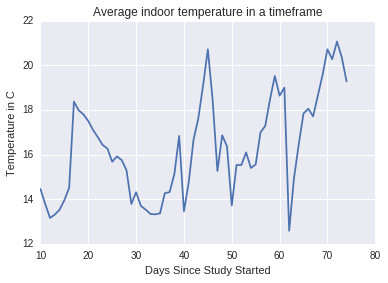

In [20]:
plot_by_days(df,'DayCount','indoor')
#try overlaying the other room temps with the kitchen ones too 

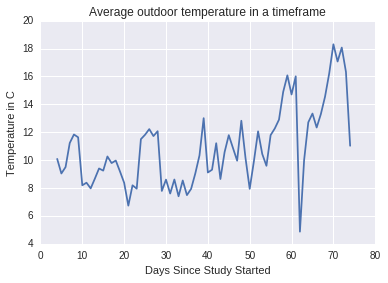

In [21]:
plot_by_days(df, 'DayCount', 'outdoor')


It's clear that, as winter progresses, it generally becomes warmer  (but people still use their stove). to confirm that the avg temperature increases over the course of the winter, the next blocks of code contain a function to plot the average daily indoor and outdoor temperatures of July, August, and September to compare 

In [25]:
def getmeanfeatureforhour (hourdf, feature):
    res = hourdf[feature].mean()
    return res
def featurehourplot(df, feature, title):
    #feature for example could be a temperature or pollutant concentration
    dfhour0 = df[df['Hour'] == 0]
    feat0 = getmeanfeatureforhour(dfhour0, feature)
    dfhour1 = df[df['Hour'] == 1]
    feat1= getmeanfeatureforhour(dfhour1, feature)
    dfhour2 = df[df['Hour'] == 2]
    feat2 = getmeanfeatureforhour(dfhour2, feature)
    dfhour3 = df[df['Hour'] == 3]
    feat3 = getmeanfeatureforhour(dfhour3, feature)
    dfhour4 = df[df['Hour'] == 4]
    feat4 = getmeanfeatureforhour(dfhour4, feature)
    dfhour5 = df[df['Hour'] == 5]
    feat5 = getmeanfeatureforhour(dfhour5, feature)
    dfhour6 = df[df['Hour'] == 6]
    feat6 = getmeanfeatureforhour(dfhour6, feature)
    dfhour7 = df[df['Hour'] == 7]
    feat7 = getmeanfeatureforhour(dfhour7, feature)
    dfhour8 = df[df['Hour'] == 8]
    feat8 = getmeanfeatureforhour(dfhour8, feature)
    dfhour9 = df[df['Hour'] == 9]
    feat9 = getmeanfeatureforhour(dfhour9, feature)
    dfhour10 = df[df['Hour'] == 10]
    feat10 = getmeanfeatureforhour(dfhour10, feature)
    dfhour11 = df[df['Hour'] == 11]
    feat11 = getmeanfeatureforhour(dfhour11, feature)
    dfhour12 = df[df['Hour'] == 12]
    feat12 = getmeanfeatureforhour(dfhour12, feature)
    dfhour13 = df[df['Hour'] == 13]
    feat13 = getmeanfeatureforhour(dfhour13, feature)
    dfhour14 = df[df['Hour'] == 14]
    feat14 = getmeanfeatureforhour(dfhour14, feature)
    dfhour15 = df[df['Hour'] == 15]
    feat15 = getmeanfeatureforhour(dfhour15, feature)
    dfhour16 = df[df['Hour'] == 16]
    feat16 = getmeanfeatureforhour(dfhour16, feature)
    dfhour17 = df[df['Hour'] == 17]
    feat17 = getmeanfeatureforhour(dfhour17, feature)
    dfhour18 = df[df['Hour'] == 18]
    feat18 = getmeanfeatureforhour(dfhour18, feature)
    dfhour19 = df[df['Hour'] == 19]
    feat19 = getmeanfeatureforhour(dfhour19, feature)
    dfhour20 = df[df['Hour'] == 20]
    feat20 = getmeanfeatureforhour(dfhour20, feature)
    dfhour21 = df[df['Hour'] == 21]
    feat21 = getmeanfeatureforhour(dfhour21, feature)
    dfhour22 = df[df['Hour'] == 22]
    feat22 = getmeanfeatureforhour(dfhour22, feature)
    dfhour23 = df[df['Hour'] == 23]
    feat23 = getmeanfeatureforhour(dfhour23, feature)

    hourlist = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    featlist = [feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,feat21,feat22,feat23]
    plt.plot(hourlist, featlist, label=title)
    plt.legend
    plt.xlabel('Hour')
    if feature[0:1] == 'H0':
        plt.ylabel('Temp, Degrees C')
    else:
        plt.ylabel(feature)
    plt.title(title)
    
def compute_avg_val(df):
    df['AvgHouse'] = (df['H01-K-E'].mean()+ df['H02-K-N'].mean() + df['H03-K-S'].mean()+ df['H04-K-S'].mean()
                      + df['H05-K-N'].mean()+df['H06-K-N'].mean() + df['H10-K-N'].mean()
                      +df['H11-K-X'].mean()+ df['H12-K-N'].mean() + df['H15-K-S'].mean() +df['H17-K-N'].mean() 
                      + df['H18-K-S'].mean() + df['H20-K-S'].mean()
                      )/13
    return df

def groupping(df,header):
    grouped = df.groupby(header)
    df = grouped.apply(compute_avg_val)
    return df

In [26]:
julydf = df[df['Month']==7]
augustdf = df[df['Month']== 8]
sepdf = df[df['Month']==9]

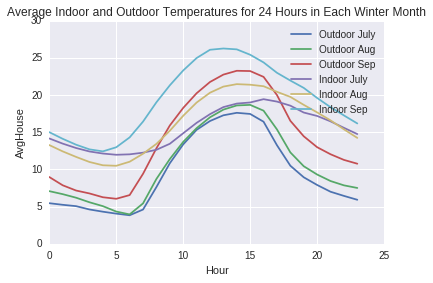

In [28]:
julydf = groupping(julydf, 'Hour')
augustdf =groupping(augustdf,'Hour')
sepdf = groupping(sepdf,'Hour')

featurehourplot(julydf, 'Temperature_(degC)', 'Average Outdoor Temperature over Each Hour of Day')
featurehourplot(augustdf, 'Temperature_(degC)', 'Average Outdoor Temperature over Each Hour of Day')
featurehourplot(sepdf, 'Temperature_(degC)', 'Average Outdoor Temperature over Each Hour of Day')
featurehourplot(julydf, 'AvgHouse', 'Average Outdoor Temperature over Each Hour of Day')
featurehourplot(augustdf, 'AvgHouse', 'Average Outdoor Temperature over Each Hour of Day')
featurehourplot(sepdf, 'AvgHouse', 'Average Outdoor Temperature over Each Hour of Day')

plt.legend(['Outdoor July','Outdoor Aug','Outdoor Sep','Indoor July','Indoor Aug','Indoor Sep'])
plt.title('Average Indoor and Outdoor Temperatures for 24 Hours in Each Winter Month')


next compare mean differences

next get ANOVA to look at PM4 vs avg difference

separate hot/cold days by stds from the mean. <1 is 1 cat, >1 is two other cats

Is there some threshold temp where pollution is particularly bad?
    look at all PMs and if avg temp is 1 std outside the mean winter temp 
    check WHO and EPA for threshold concs. 1 hr max lim of 100 mg/m3
    
dont forget to correct dusttracks! 

Is PM4 conc in strong correlation with PM2.5 and PM10? 